In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
df= pd.read_csv("../data/data.csv",delimiter=";")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [51]:
df['Target_encoded'] = 0
df.loc[df['Target'] != 'Graduate', 'Target_encoded'] = 1
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_encoded
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


In [54]:
df.drop('Target',axis=1,inplace=True)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [55]:
X = df.drop("Target_encoded",axis=1)
y=df['Target_encoded']
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3096, 36), (1328, 36), (3096,), (1328,))

## base Model

In [57]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_predict_gnb = gnb.predict(X_test)

In [58]:
print(classification_report(y_true=y_test, y_pred=y_predict_gnb))


              precision    recall  f1-score   support

           0       0.71      0.90      0.80       672
           1       0.86      0.63      0.73       656

    accuracy                           0.77      1328
   macro avg       0.79      0.77      0.76      1328
weighted avg       0.79      0.77      0.76      1328



In [27]:
print(confusion_matrix(y_true=y_test, y_pred=y_predict_gnb))

[[325 111]
 [ 72 581]]


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    """
    Plot a confusion matrix using Seaborn.

    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.

    Returns:
        None
    """
    cm = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
                     annot_kws={"fontsize": 14, "fontweight": "bold"})
    ax.set_xlabel("Predicted labels", fontsize=14, fontweight="bold")
    ax.set_ylabel("True labels", fontsize=14, fontweight="bold")
    ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold")
    ax.xaxis.set_ticklabels(["Negative", "Positive"], fontsize=12)
    ax.yaxis.set_ticklabels(["Negative", "Positive"], fontsize=12)
    plt.show()


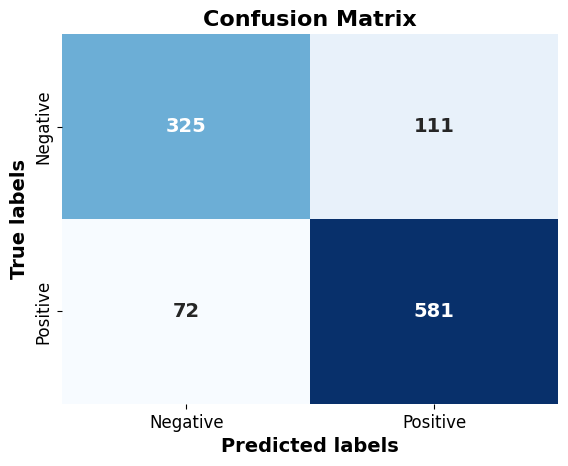

In [33]:
plot_confusion_matrix(y_true=y_test, y_pred=y_predict_gnb)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def classification_metrics(y_true, y_pred):
    """
    Compute classification metrics and return them in a dictionary.

    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.

    Returns:
        dict: A dictionary containing the classification metrics.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    metrics_dict = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }
    
    return metrics_dict


In [61]:
model_gnb_score = classification_metrics(y_true=y_test, y_pred=y_predict_gnb)
print(model_gnb_score)

{'accuracy': 0.7673192771084337, 'precision': 0.8607068607068608, 'recall': 0.6310975609756098, 'f1': 0.7282321899736148}


In [ ]:
models ={

}